# Excercise 3: Finite Size Scaling


In [21]:
import numpy as np
from generate_data import load_data
from matplotlib import pyplot as plt
plt.style.use("dark_background")


In [35]:
# load the data
data = load_data("data_square/data_ising_square_largeL.pkl")
print(data.keys())
print(data[8].keys())
print(data['Ls'])

dict_keys([16, 128, 32, 8, 64, 'Ls', 256])
dict_keys(['absM', 'UB', 'observables', 'L', 'chi', 'M', 'N_measure', 'C', 'N_bins', 'E', 'Ts'])
[8, 16, 32, 64, 128, 256]


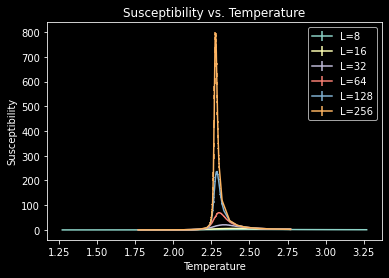

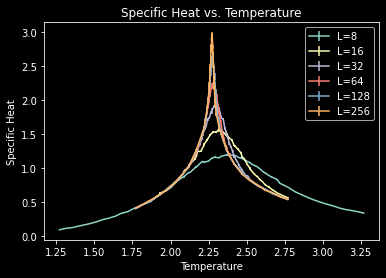

In [37]:
# a)

T_max_chis = []
T_max_Cs = []
# plot the data
plt.figure()
for L in data['Ls']:
    plt.errorbar(data[L]['Ts'], data[L]['chi'][:,0], yerr=data[L]['chi'][:,1], label="L={}".format(L))
    T_max_chis.append(data[L]['Ts'][np.argmax(data[L]['chi'][:,0])])

plt.ylabel("Susceptibility")
plt.xlabel("Temperature")
plt.title("Susceptibility vs. Temperature")
plt.legend()



plt.figure()
for L in data['Ls']:
    plt.errorbar(data[L]['Ts'], data[L]['C'][:,0], yerr=data[L]['C'][:,1], label="L={}".format(L))
    T_max_Cs.append(data[L]['Ts'][np.argmax(data[L]['C'][:,0])])

plt.ylabel("Specific Heat")
plt.xlabel("Temperature")
plt.title("Specific Heat vs. Temperature")
plt.legend()

plt.show()


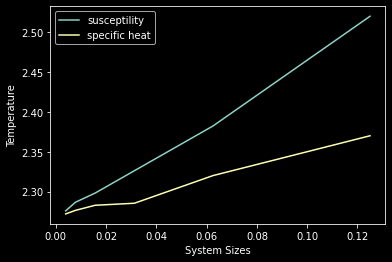

Critical Temperature for susceptibility is T_c = 2.266420956442279
Critical Temperature for specific heat is T_c = 2.267753579043558


In [51]:
# b) Print Ts of peak

plt.xlabel("System Sizes")
plt.ylabel("Temperature")

# Susceptibility
plt.plot(1./np.array(data['Ls']), T_max_chis, label="susceptility")
# Specific Heat
plt.plot(1./np.array(data['Ls']), T_max_Cs, label="specific heat")

plt.legend()
plt.show()

fit = np.polyfit(1./np.array(data['Ls']), T_max_chis, 1)
y_0 = fit[1]
print("Critical Temperature for susceptibility is T_c = {}".format(y_0))

fit = np.polyfit(1./np.array(data['Ls']), T_max_Cs, 1)
y_0 = fit[1]
print("Critical Temperature for specific heat is T_c = {}".format(y_0))

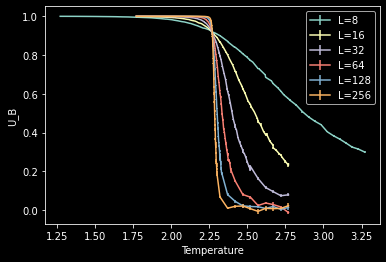

34 38
33 40
32 43
29 50
23 61
11 61
[2.22, 2.27, 2.2648979591836733, 2.231734693877551, 2.21515306122449]
[8, 16, 32, 64, 128]


In [79]:
# c) Binder cumulant

UBs = []

for L in data['Ls']:
    plt.errorbar(data[L]['Ts'], data[L]['UB'][:,0], yerr=data[L]['UB'][:,1], label="L={}".format(L))

plt.xlabel("Temperature")
plt.ylabel("U_B")
plt.legend()
plt.show()

T_intersects = []
L_intersects = []

for L in data['Ls']:
    try:

        max_idx = np.argmin(abs(data[L]['Ts']-2.2))
        min_idx = np.argmin(abs(data[L]['Ts']-2.3))

        print(min_idx, max_idx)

        T_intersects.append(data[L]['Ts'][min_idx + np.argmin(abs(data[L]['UB'][min_idx:max_idx,0] - data[2*L]['UB'][min_idx:max_idx,0]))])
        L_intersects.append(L)
    except KeyError:
        break


print(T_intersects)
print(L_intersects)



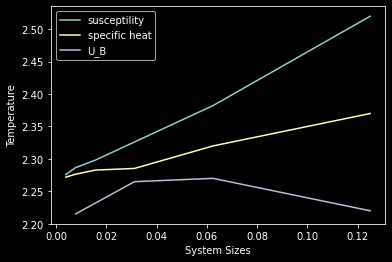

Critical Temperature for susceptibility is T_c = 2.266420956442279
Critical Temperature for specific heat is T_c = 2.267753579043558
Critical Temperature for UB is T_c = 2.240357142857143


In [84]:
plt.xlabel("System Sizes")
plt.ylabel("Temperature")

# Susceptibility
plt.plot(1./np.array(data['Ls']), T_max_chis, label="susceptility")
# Specific Heat
plt.plot(1./np.array(data['Ls']), T_max_Cs, label="specific heat")

# Binder cumulant
plt.plot(1./np.array(L_intersects), T_intersects, label="U_B")

plt.legend()
plt.show()

fit = np.polyfit(1./np.array(data['Ls']), T_max_chis, 1)
y_0 = fit[1]
print("Critical Temperature for susceptibility is T_c = {}".format(y_0))

fit = np.polyfit(1./np.array(data['Ls']), T_max_Cs, 1)
y_0 = fit[1]
print("Critical Temperature for specific heat is T_c = {}".format(y_0))

print("Critical Temperature for UB is T_c = {}".format(np.mean(T_intersects)))